In [14]:
import pandas as pd
import folium
from folium import plugins
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from folium import plugins
import folium
from folium import plugins
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

In [4]:
df = pd.read_csv('listing.csv')

In [5]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210804005827,2021-08-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.34
1,3831,https://www.airbnb.com/rooms/3831,20210804005827,2021-08-04,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.81,4.72,4.65,NaN,f,1,1,0,0,5.09
2,5121,https://www.airbnb.com/rooms/5121,20210804005827,2021-08-04,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,1,0,1,0,0.55
3,5136,https://www.airbnb.com/rooms/5136,20210804005827,2021-08-04,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.00,5.00,NaN,f,1,1,0,0,0.01
4,5178,https://www.airbnb.com/rooms/5178,20210804005827,2021-08-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.40,4.86,4.35,NaN,f,1,0,1,0,3.63


# Data Exploration

<AxesSubplot:>

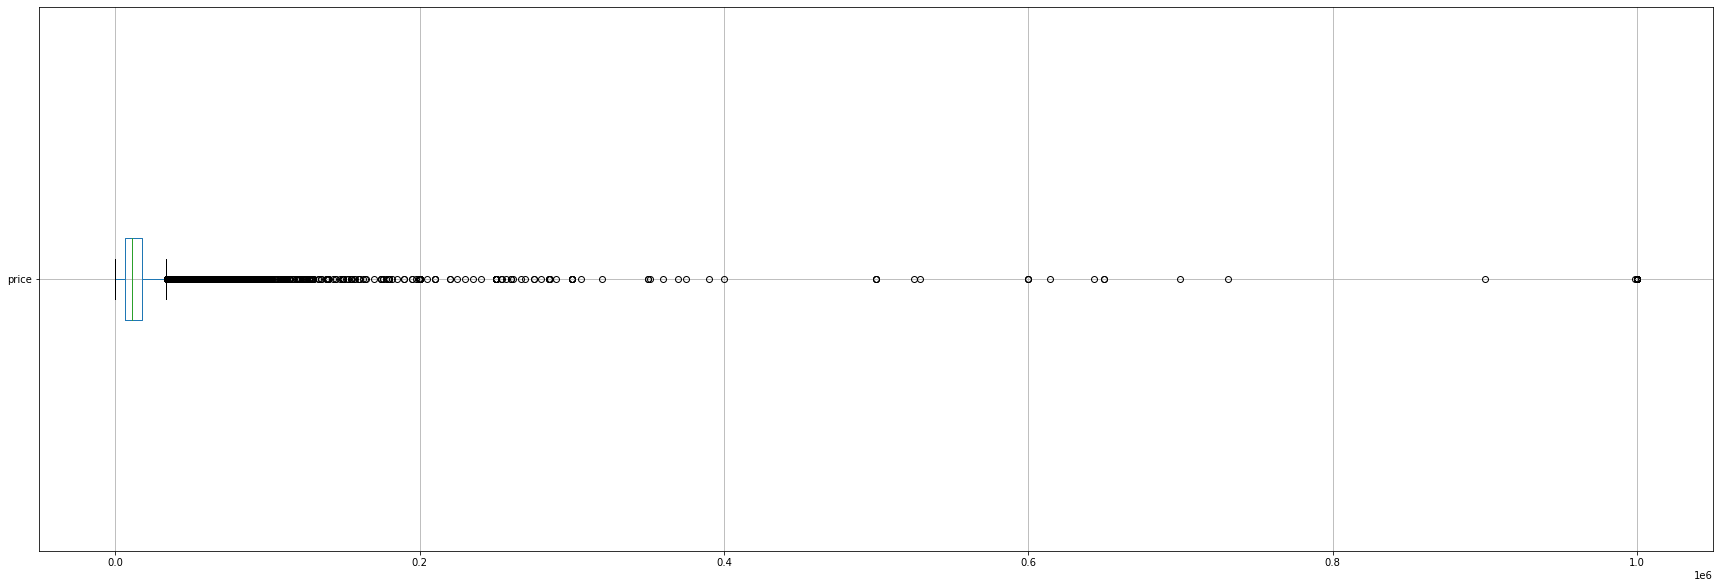

In [24]:
#df.price = df.price.str.replace('$', '')
#df.price = df.price.replace('\D', '', regex=True).astype(int)
df.boxplot(column=['price'], vert=False, figsize=(30,10))

obervation: lots of outliners from the box plot

In [27]:
# remove outliners by setting the Price
df = df.query('price < 40000')
len(df)
#still 34917 records remain

34917

In [28]:
# Using heatmap to see the distribution of the hosts

data = {'latitude': df.latitude, 'longitude': df.longitude}
heatmap = pd.DataFrame(data=data)
heatmap

,latitude,longitude
0,40.753560,-73.985590
1,40.684940,-73.957650
2,40.685350,-73.955120
3,40.662650,-73.994540
4,40.764570,-73.983170
...,...,...
36719,40.755787,-73.965126
36720,40.787029,-73.969239
36721,40.768950,-73.960455
36722,40.599257,-73.797953


In [30]:
m = folium.Map([40.753560, -73.985590], zoom_start=11)

# convert to (n, 2) nd-array format for heatmap
stationArr = heatmap.values

# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=11))
m

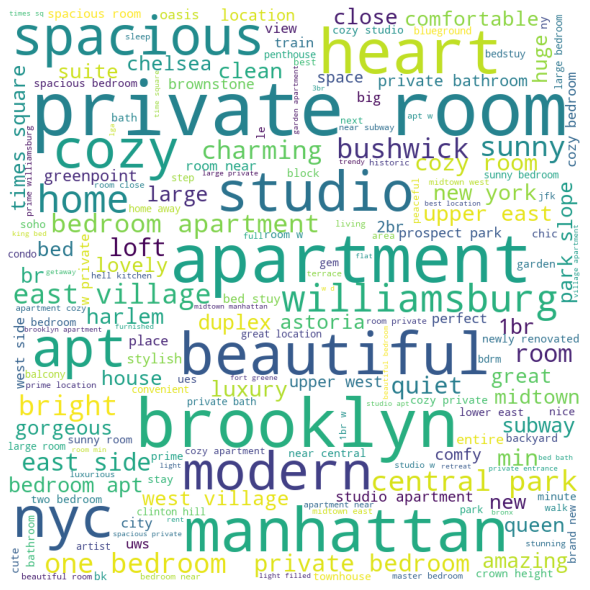

In [31]:
# Exploring the name column
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.name:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Data Cleaning

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34917 entries, 0 to 36723
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            34917 non-null  int64  
 1   listing_url                                   34917 non-null  object 
 2   scrape_id                                     34917 non-null  int64  
 3   last_scraped                                  34917 non-null  object 
 4   name                                          34904 non-null  object 
 5   description                                   33733 non-null  object 
 6   neighborhood_overview                         21534 non-null  object 
 7   picture_url                                   34917 non-null  object 
 8   host_id                                       34917 non-null  int64  
 9   host_url                                      34917 non-null 

In [5]:
# Dropping useless columns
df.drop(columns=['id', 'listing_url', 'scrape_id', 'last_scraped', 'picture_url', 
                      'host_url', 'host_thumbnail_url', 'host_picture_url'], inplace=True)

In [6]:
df.drop(columns=['host_id', 'host_name'], inplace=True)

In [7]:
df.drop(columns=['calendar_last_scraped'], inplace=True)

# Handle missing values

In [54]:
df.isnull().sum()

description                                     0
host_since                                      0
host_location                                   0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0


In [8]:
# if variables have more than 35% missing value, drop the variable

li = []

for column in df.columns:
    if df[column].isnull().sum() / len(df) > 0.35:
        li.append(column)
        
df.drop(columns = li, inplace=True)

In [9]:
# if the variables have less than 1% of missing value, drop those row

li2 = []

for column in df.columns:
    if df[column].isnull().sum() / len(df) < 0.01:
        li2.append(column)
        
df.dropna(subset=li2, inplace=True)

In [10]:
#for bedrooms and beds, replace th missing value with mode
mode = df.bedrooms.mode()
#mode = 1
df.bedrooms.fillna(1, inplace=True)

In [11]:
mode = df.beds.mode()
#mode = 1
df.beds.fillna(1, inplace=True)

In [12]:
#for review, replace th missing value with mean
li3 = ['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication'
      ,'review_scores_location','review_scores_value']

for column in li3:
    mean = df[column].mean()
    df[column].fillna(mean, inplace=True)

In [53]:
#mean = df['df.review_scores_rating'].mean()
df['review_scores_rating'].fillna(0, inplace=True)

In [13]:
#df[column].fillna(mean, inplace=True)
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)

In [14]:
#filling the date for first review as 2021, consider them as new new hosts
df['first_review'].fillna('2021-01-01',inplace=True)
df['last_review'].fillna('2021-01-01',inplace=True )

# Feature Enginerring

In [ ]:
#for first_review, last_review, description, host_neighbourhood

In [15]:
#drop the host_neighbourhood columns since I guess it has no correlation with the price
df.drop(columns=['host_neighbourhood'], inplace=True)

In [16]:
#drop the host_neighbourhood_cleansed columns since I guess it has no correlation with the price
df.drop(columns=['neighbourhood_cleansed'], inplace=True)

In [17]:
#drop the neighbourhood_group_cleansed columns since I guess it has no correlation with the price
df.drop(columns=['neighbourhood_group_cleansed'], inplace=True)

In [18]:
#replace the first_review, and last review 
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [19]:
#Keep the year only
df['first_review'] = df['first_review'].dt.year
df['last_review'] = df['last_review'].dt.year

In [20]:
#convert to object for the ML models
df['first_review'] = df['first_review'].astype(str)
df['last_review'] = df['last_review'].astype(str)

In [21]:
#Keep the year only for host_since
df['host_since'] = pd.to_datetime(df['first_review'])
df['host_since'] = df['host_since'].dt.year
df['host_since'] = df['host_since'].astype(str)

In [22]:
#convert description to True or False
df.description.loc[df.description.notna()] = 1 
df.description.loc[df.description.isna()] = 0


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
# Convert host_location to inside ny or outside ny, 0 -> outside, 1 -> inside
df.host_location[df['host_location'].str.contains('New York')] = 1
df.host_location[df['host_location'].str.contains('New York') == False] = 0


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
#Convert host_verifications to its length, longer means more verficated
df.host_verifications = df.host_verifications.str.len()

In [25]:
#drop the property_type, cause room_type can represents the property type
df.drop(columns=['property_type'], inplace=True)

In [26]:
#Convert amenities to its length, longer means more amenities
df.amenities = df.amenities.str.len()

# Training Models

In [39]:
df.head(1)

,description,host_since,host_location,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1,2009,1,0,6.0,6.0,121,1,1,40.75356,...,4.76,4.79,4.86,4.41,0,3,3,0,0,0.34


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36485 entries, 0 to 36723
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   description                                   36485 non-null  int64  
 1   host_since                                    36485 non-null  int64  
 2   host_location                                 36485 non-null  int64  
 3   host_is_superhost                             36485 non-null  object 
 4   host_listings_count                           36485 non-null  float64
 5   host_total_listings_count                     36485 non-null  float64
 6   host_verifications                            36485 non-null  int64  
 7   host_has_profile_pic                          36485 non-null  object 
 8   host_identity_verified                        36485 non-null  object 
 9   latitude                                      36485 non-null 

In [28]:
#Converting Price to int
df.price = df.price.replace('\D', '', regex=True).astype(int)

In [29]:
#Convert some of the categorical data to numric
df['host_since'] = df['host_since'].astype(int)

In [30]:
df['host_location'] = df['host_location'].astype(int)

In [31]:
df.drop(columns=['bathrooms_text'], inplace=True)

In [32]:
df['first_review'] = df['first_review'].astype(int)
df['last_review'] = df['last_review'].astype(int)

In [33]:
df['description'] = df['description'].astype(int)

In [34]:
df.drop(columns=['name'], inplace=True)

In [38]:
df['host_is_superhost'][df['host_is_superhost'].str.contains('f') == True] = 0
df['host_is_superhost'][df['host_is_superhost'].str.contains('t') == True] = 1


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
#convert f,t to int
li4 = ['host_has_profile_pic','host_identity_verified','has_availability','instant_bookable']

for column in li4:
    df[column][df[column].str.contains('f') == True] = 0
    df[column][df[column].str.contains('t') == True] = 1


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

# Perform LabelEncoder

In [55]:
df_model = df.copy()

In [56]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_model['room_type'] = labelencoder.fit_transform(df_model['room_type'])

In [57]:
df_model.head(3)

,description,host_since,host_location,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1,2009,1,0,6.0,6.0,121,1,1,40.75356,...,4.76,4.79,4.86,4.41,0,3,3,0,0,0.34
1,1,2015,1,0,1.0,1.0,78,1,1,40.68494,...,4.79,4.81,4.72,4.65,0,1,1,0,0,5.09
3,1,2014,1,0,1.0,1.0,29,1,1,40.66265,...,5.00,5.00,4.00,5.00,0,1,1,0,0,0.01


# Feature Selection

In [58]:
X = df_model.drop(columns=['price','longitude','host_identity_verified' ])
y = df_model.price

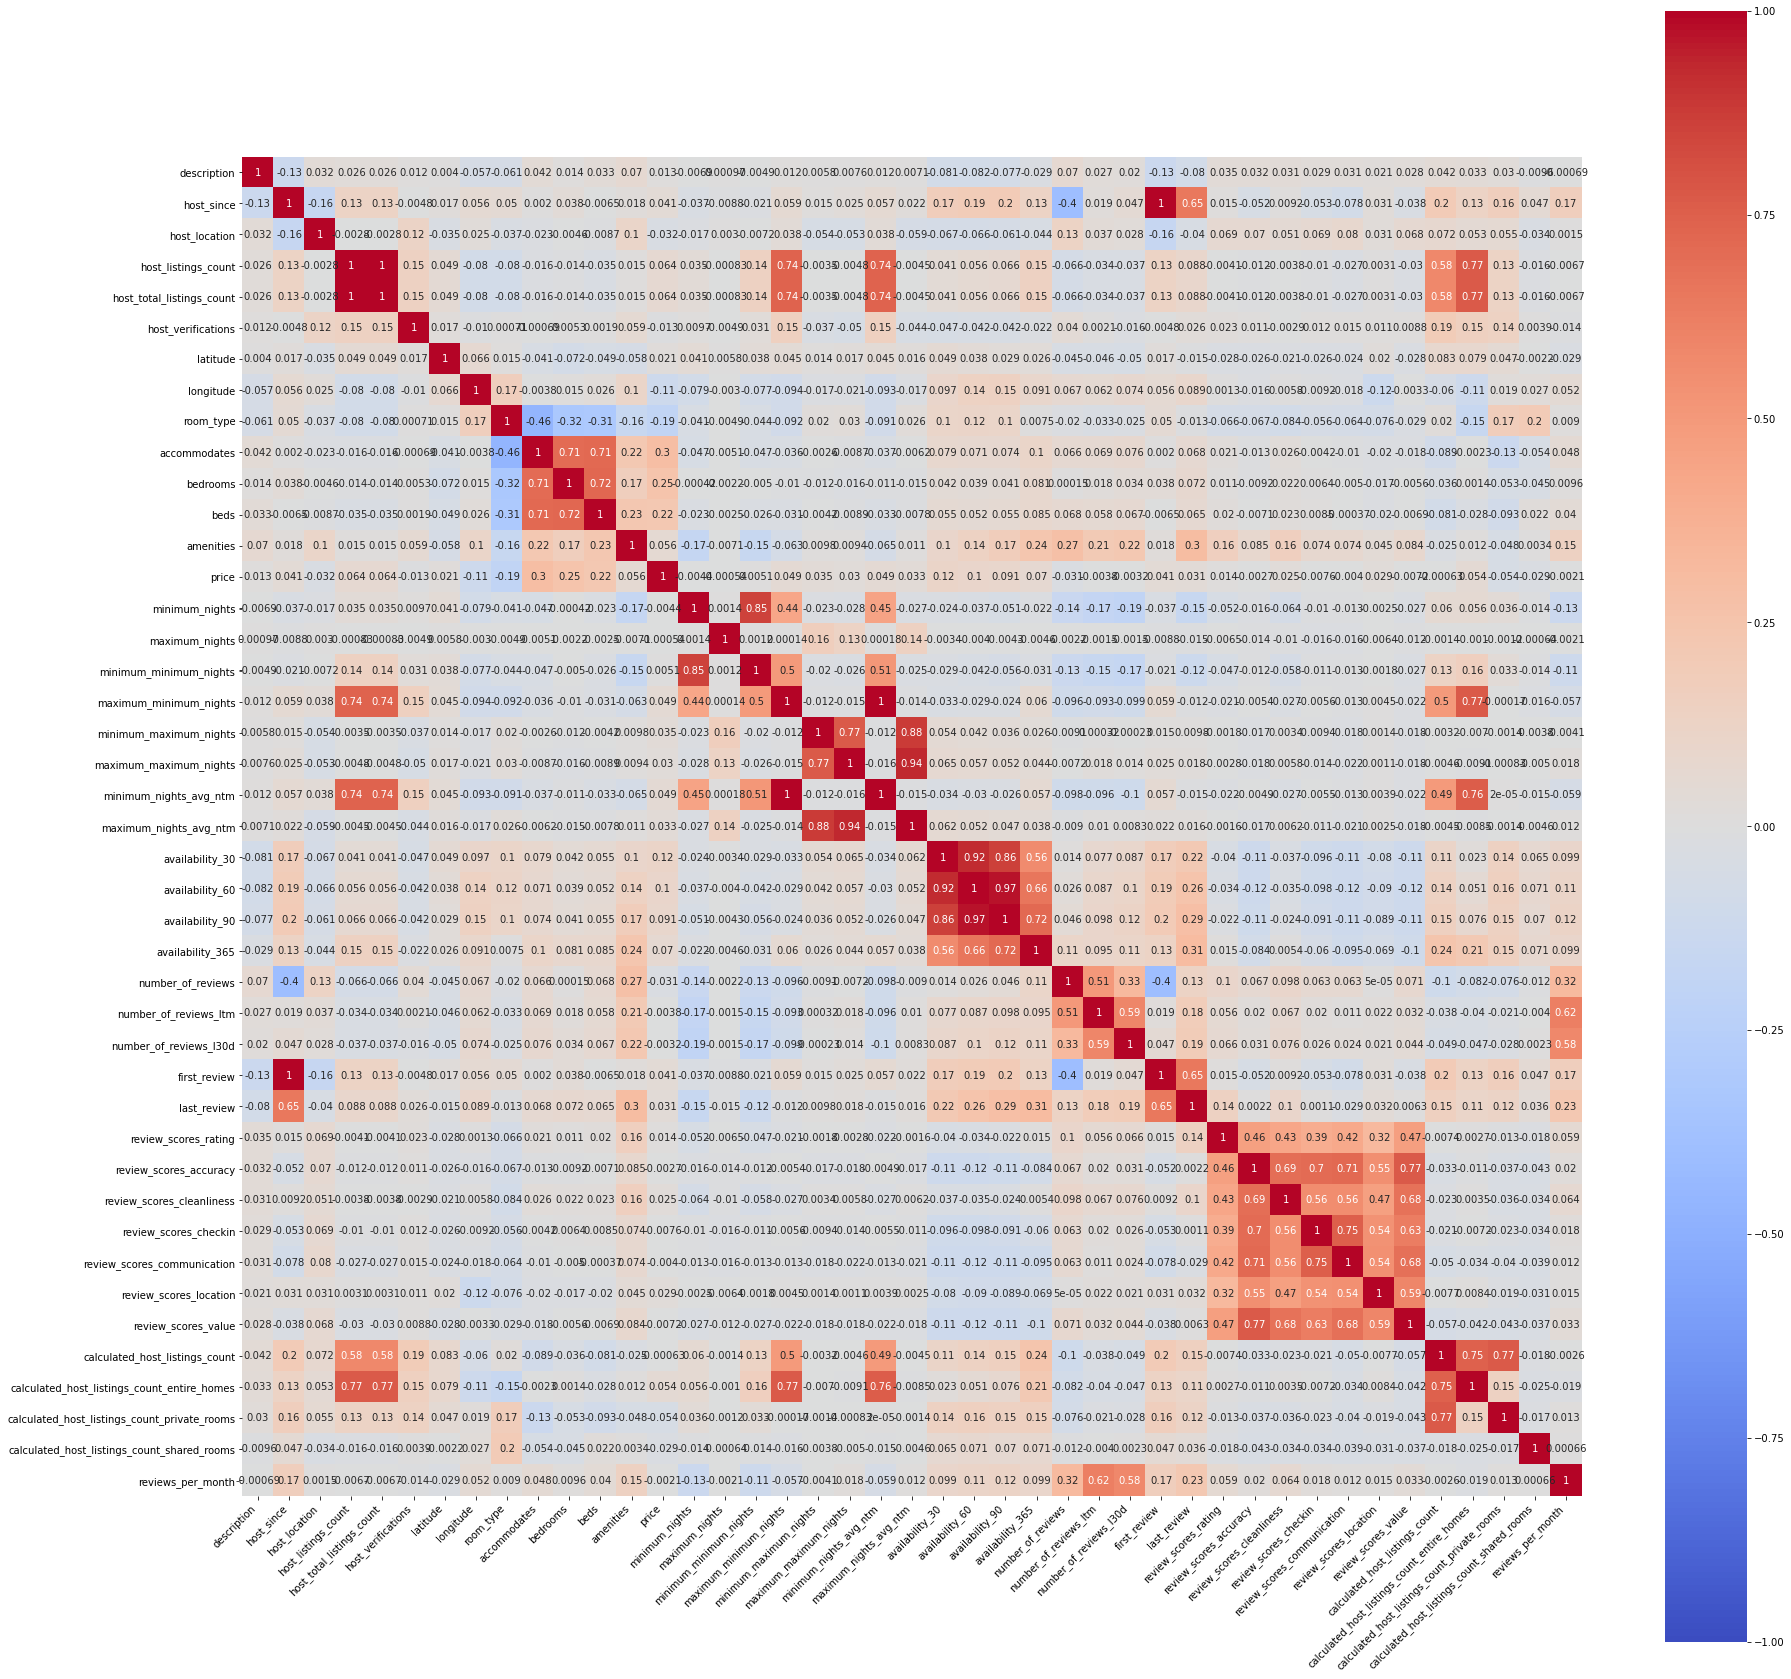

In [375]:
# check correlation between variables
import seaborn as sns
fig, ax = plt.subplots(figsize=(30, 30))
corr = df_model.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [59]:
#Getting the best feature from SelectFromModel

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor

sfm_selector = SelectFromModel(estimator=ExtraTreesRegressor())
sfm_selector.fit(X, y)
selected_columns = X.columns[sfm_selector.get_support()]
selected_columns

Index(['host_listings_count', 'host_total_listings_count',
       'host_verifications', 'latitude', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'amenities', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_checkin',
       'review_scores_location', 'reviews_per_month'],
      dtype='object')

In [60]:
#Getting the best feature from selectkbest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                                          Specs         Score
18                       minimum_maximum_nights  2.292463e+13
21                       maximum_nights_avg_ntm  1.696399e+13
19                       maximum_maximum_nights  1.479066e+13
15                               maximum_nights  1.697208e+11
4                           host_listings_count  1.454323e+07
5                     host_total_listings_count  1.454323e+07
17                       maximum_minimum_nights  1.657138e+06
20                       minimum_nights_avg_ntm  1.584114e+06
41  calculated_host_listings_count_entire_homes  1.287384e+06
40               calculated_host_listings_count  8.013058e+05


In [61]:
waitingforjoin = ['minimum_maximum_nights', 'maximum_nights_avg_ntm', 'maximum_maximum_nights'
                  ,'maximum_minimum_nights','minimum_nights_avg_ntm','calculated_host_listings_count_entire_homes'
                 ,'calculated_host_listings_count']

selected_columns

features = list(selected_columns) + waitingforjoin

In [62]:
features

['host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'latitude',
 'room_type',
 'accommodates',
 'bedrooms',
 'beds',
 'amenities',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_checkin',
 'review_scores_location',
 'reviews_per_month',
 'minimum_maximum_nights',
 'maximum_nights_avg_ntm',
 'maximum_maximum_nights',
 'maximum_minimum_nights',
 'minimum_nights_avg_ntm',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count']

# LightGBM

In [63]:
X = X[features]

In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [382]:
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

Text(0.5, 1.0, 'Light GBM Feature Importance')

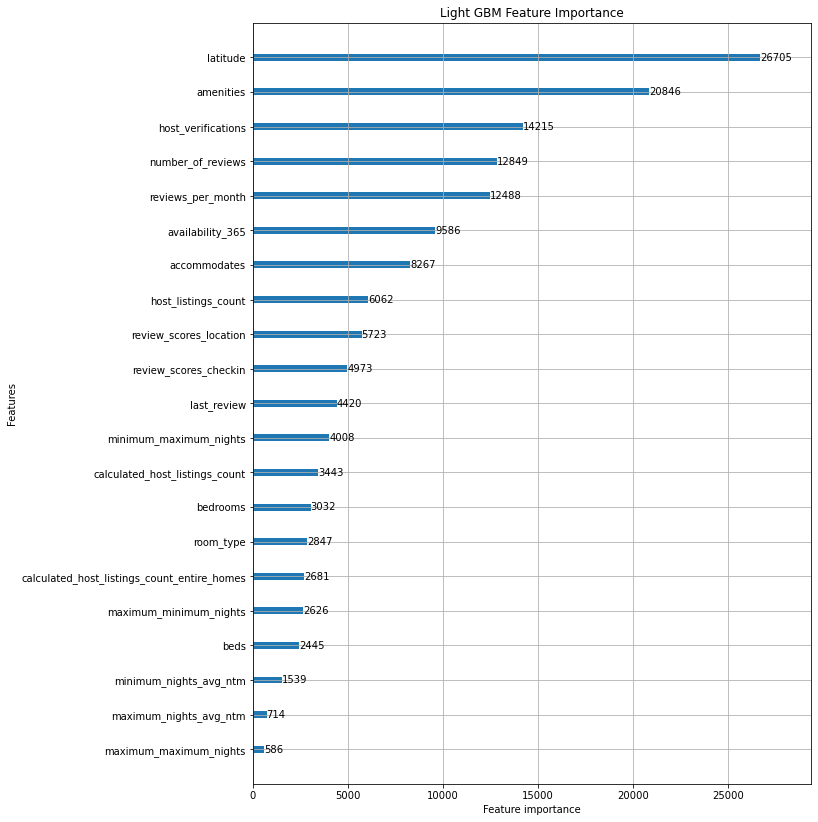

In [383]:
fig, ax = plt.subplots(figsize=(10, 14))
lgb.plot_importance(clf, max_num_features=50, ax=ax)
plt.title("Light GBM Feature Importance")

In [384]:
y_pred=clf.predict(X_test)

In [385]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

28472.31418325095

# Optuna for LGBM

In [68]:
import numpy as np
import optuna
import lightgbm as lgb
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

X = X[features]
y = df_model.price 

def objective(trial):
   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    dtrain = lgb.Dataset(X_train, label=y_train)

    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    
    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2021-09-21 17:50:43,653] A new study created in memory with name: no-name-3376489b-8f25-44c6-b27d-54fc24f20d37
[I 2021-09-21 17:50:43,754] Trial 0 finished with value: 0.0 and parameters: {'lambda_l1': 4.550714107681804, 'lambda_l2': 0.007145394785751264, 'num_leaves': 163, 'feature_fraction': 0.7302901881768751, 'bagging_fraction': 0.8261238773638325, 'bagging_freq': 1, 'min_child_samples': 93}. Best is trial 0 with value: 0.0.
[I 2021-09-21 17:50:43,861] Trial 1 finished with value: 0.0 and parameters: {'lambda_l1': 6.439609666128715e-07, 'lambda_l2': 1.4395198705232224e-05, 'num_leaves': 20, 'feature_fraction': 0.7736371207753598, 'bagging_fraction': 0.8113275098148103, 'bagging_freq': 5, 'min_child_samples': 79}. Best is trial 0 with value: 0.0.
[I 2021-09-21 17:50:43,963] Trial 2 finished with value: 0.0 and parameters: {'lambda_l1': 5.961765855943423e-05, 'lambda_l2': 0.029103312101866452, 'num_leaves': 75, 'feature_fraction': 0.7198972887181676, 'bagging_fraction': 0.78245995

Number of finished trials: 10
Best trial:
  Value: 0.0
  Params: 
    lambda_l1: 4.550714107681804
    lambda_l2: 0.007145394785751264
    num_leaves: 163
    feature_fraction: 0.7302901881768751
    bagging_fraction: 0.8261238773638325
    bagging_freq: 1
    min_child_samples: 93


In [69]:
X = X[features]
y = df_model.price 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
clf = lgb.LGBMClassifier(lambda_l1=0.00001025872037382037, lambda_l2=4.1264192014253265,num_leaves=137,feature_fraction=0.6641788734286163
                         ,bagging_fraction=0.878409541007739,bagging_freq=5,min_child_samples=88)

clf.fit(X_train, y_train)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l1 is set=1.025872037382037e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.025872037382037e-05
[LightGBM] [Warning] feature_fraction is set=0.6641788734286163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6641788734286163
[LightGBM] [Warning] bagging_fraction is set=0.878409541007739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.878409541007739
[LightGBM] [Warning] lambda_l2 is set=4.1264192014253265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.1264192014253265


LGBMClassifier(bagging_fraction=0.878409541007739, bagging_freq=5,
               feature_fraction=0.6641788734286163,
               lambda_l1=1.025872037382037e-05, lambda_l2=4.1264192014253265,
               min_child_samples=88, num_leaves=137)

In [428]:
y_pred=clf.predict(X_test)

In [429]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

25618.486114635536

# Model Interpretation

In [71]:
import shap

explainer = shap.Explainer(clf)
shap_values = explainer(X_train)